In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets
from tensorflow.keras import layers
from tensorflow.keras.models import Model

## Load Data

In [2]:
(X_train, _), (X_test, _) = datasets.mnist.load_data()

print(X_train.shape)
print(X_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


## Preprocess Data

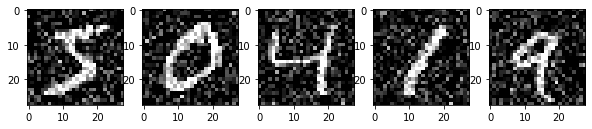

In [3]:
# Normalization
X_train2 = X_train.astype('float32') / 255.
X_test2 = X_test.astype('float32') / 255.

# Adding Noise
noise_train = 0.4 * np.random.normal(loc=0.0, scale=0.7, size=X_train.shape)
noise_test = 0.4 * np.random.normal(loc=0.0, scale=0.7, size=X_test.shape)

X_train_noisy = X_train2 + noise_train
X_test_noisy = X_test2 + noise_test

X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

fig, axes = plt.subplots(1, 5, figsize=(10,2))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train_noisy[i], cmap='gray')
plt.show()

In [4]:
X_train_vector = X_train2.reshape(len(X_train), 784)
X_test_vector = X_test2.reshape(len(X_test), 784)

X_train_vector_noisy = X_train_noisy.reshape(len(X_train), 784)
X_test_vector_noisy = X_test_noisy.reshape(len(X_test), 784)

print(X_train_vector.shape)

(60000, 784)


## Model Design

In [5]:
input_layer = layers.Input(shape=(784,))
encoder_layer = layers.Dense(16, activation='relu')(input_layer)
decoder_layer = layers.Dense(784, activation='sigmoid')(encoder_layer)

autoencoder = Model(input_layer, decoder_layer)
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 16)                12560     
                                                                 
 dense_1 (Dense)             (None, 784)               13328     
                                                                 
Total params: 25,888
Trainable params: 25,888
Non-trainable params: 0
_________________________________________________________________


## Training

In [6]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(X_train_vector_noisy, X_train_vector,
                epochs=30,
                batch_size=256)

Epoch 1/30
235/235 [==============================] - 5s 7ms/step - loss: 0.3029
Epoch 2/30
235/235 [==============================] - 2s 7ms/step - loss: 0.2040
Epoch 3/30
235/235 [==============================] - 2s 7ms/step - loss: 0.1771
Epoch 4/30
235/235 [==============================] - 2s 7ms/step - loss: 0.1632
Epoch 5/30
235/235 [==============================] - 1s 4ms/step - loss: 0.1527
Epoch 6/30
235/235 [==============================] - 1s 4ms/step - loss: 0.1454
Epoch 7/30
235/235 [==============================] - 1s 4ms/step - loss: 0.1418
Epoch 8/30
235/235 [==============================] - 1s 6ms/step - loss: 0.1402
Epoch 9/30
235/235 [==============================] - 2s 8ms/step - loss: 0.1393
Epoch 10/30
235/235 [==============================] - 2s 9ms/step - loss: 0.1387
Epoch 11/30
235/235 [==============================] - 2s 9ms/step - loss: 0.1384
Epoch 12/30
235/235 [==============================] - 2s 8ms/step - loss: 0.1380
Epoch 13/30
235/235 [====

## Evaluation

In [7]:
# Decoder output
pred = autoencoder.predict(X_test_vector)

# Encoder output
encoder_model = Model(input_layer, encoder_layer)
encoder_model.summary()
encoded_data = encoder_model.predict(X_test_vector_noisy)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 16)                12560     
                                                                 
Total params: 12,560
Trainable params: 12,560
Non-trainable params: 0
_________________________________________________________________


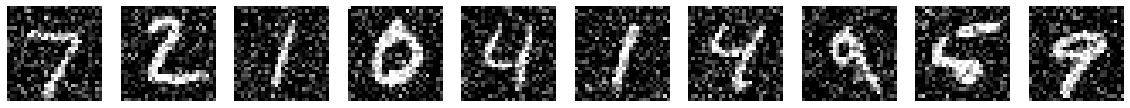

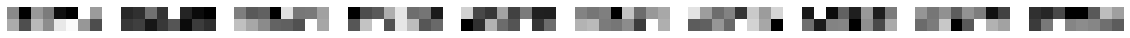

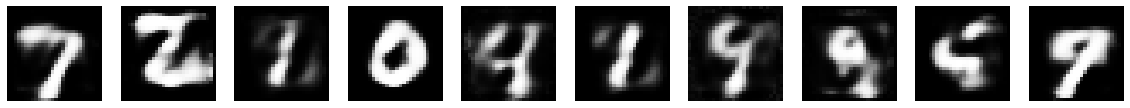

In [8]:
fig, axes = plt.subplots(1, 10, figsize=(20, 2))
for i, ax in enumerate(axes):
    ax.imshow(X_test_vector_noisy[i].reshape(28, 28), cmap='gray')
    ax.set_axis_off()

fig, axes = plt.subplots(1, 10, figsize=(20, 2))
for i, ax in enumerate(axes):
    ax.imshow(encoded_data[i].reshape(2, 8), cmap='gray')
    ax.set_axis_off()

fig, axes = plt.subplots(1, 10, figsize=(20, 2))
for i, ax in enumerate(axes):
    ax.imshow(pred[i].reshape(28, 28), cmap='gray')
    ax.set_axis_off()

plt.show()